In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

__READING DATA__

In [18]:
#reading from csv
bike_data = pd.read_csv("day.csv")

In [20]:
#Printing the Data head to understand some basics of data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
#Knowing the shape of data to understand rows and column number
bike_data.shape

(730, 16)

In [26]:
#Checking the data types for the data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [28]:
#Checking for any null value
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
#Above output indicates none of the columns have null values. So no cleanup required
#Proceeding with removing unwanted columns
# Instant as per the dataset characteristics just indicate record index. This can be removed
#casual and registered can be removed as the total is given as cnt which is the target variable
#date can also be removed as we have year and month separately present in the columns

#Dropping unwanted columns

bike_data.drop(["instant","dteday","casual" ,"registered"] ,axis =1 ,inplace=True)

In [34]:
#printing Data head after removing columns
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
#As mentioned in the problem description , season and weathersit needs to be converted to categorical values.
#Converting Season numeric values to categorical values
bike_data.season = bike_data.season.map({1:"spring", 2:"summer" ,3:"fall" , 4:"winter"})
bike_data.weathersit =bike_data.weathersit.map({1:"Clear", 2:"Misty_Cloudy" ,3:"Light_SnowRain" , 4: "Heavy_Rain"})

In [38]:
#Printing the data after converting first set numerical variables to categorical variable
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
#Convert mnth and weekday also to categorical values
bike_data.mnth = bike_data.mnth.map({1:"jan" , 2:"feb" ,3:"mar" ,4:"apr" ,5:"may" ,6:"june", 7:"july" ,8:"aug",9:"sep" ,10:"oct",11:"nov" ,12:"dec"})
bike_data.weekday = bike_data.weekday.map({0:"sun" , 1:"mon" , 2:"tue" ,3:"wed" ,4:"thu" ,5:"fri" ,6:"sat"})


In [44]:
#printing the data after convertion
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,Misty_Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,Misty_Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


__VISUALISING DATA__

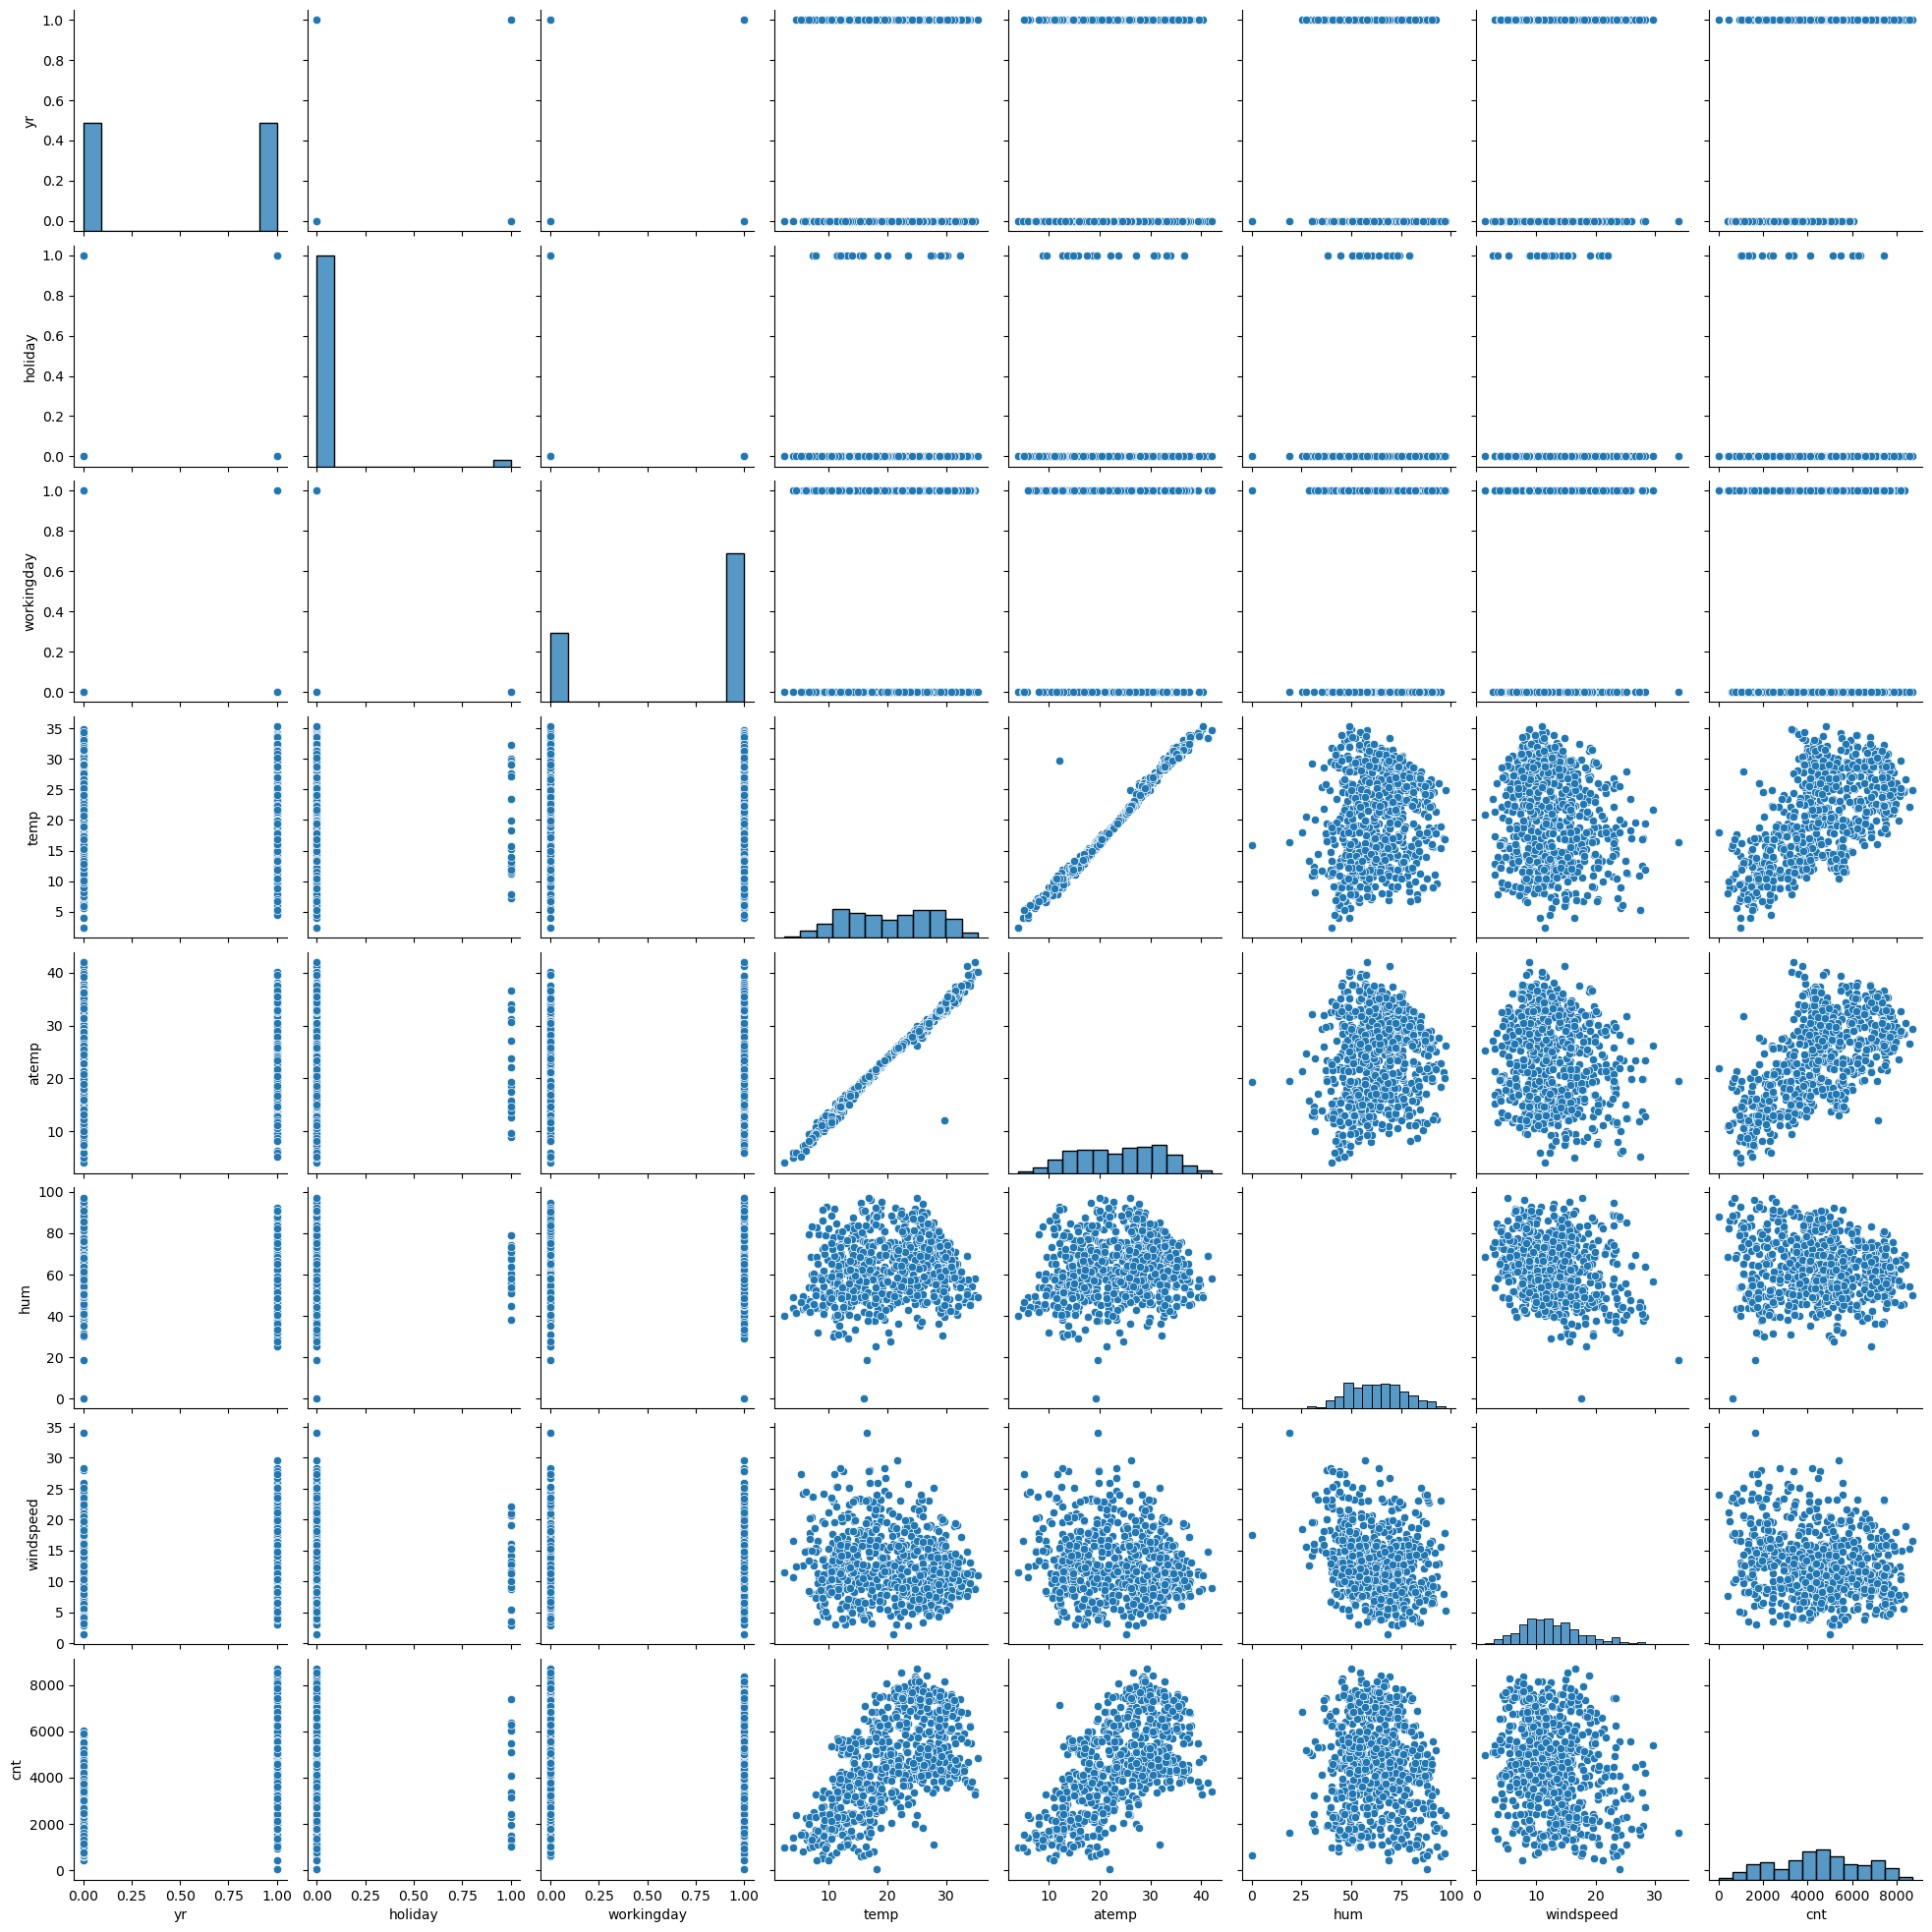

In [48]:
#Check for some obvious multi collinearity 
#Check the strong association between variables

# Checking the pair plot for numerical variables
sns.pairplot(bike_data)
plt.show()

* From above pair plot it is observed that temp,atemp ,hum ,windspeed have a good linear regression trend towards cnt

<Axes: xlabel='weathersit', ylabel='cnt'>

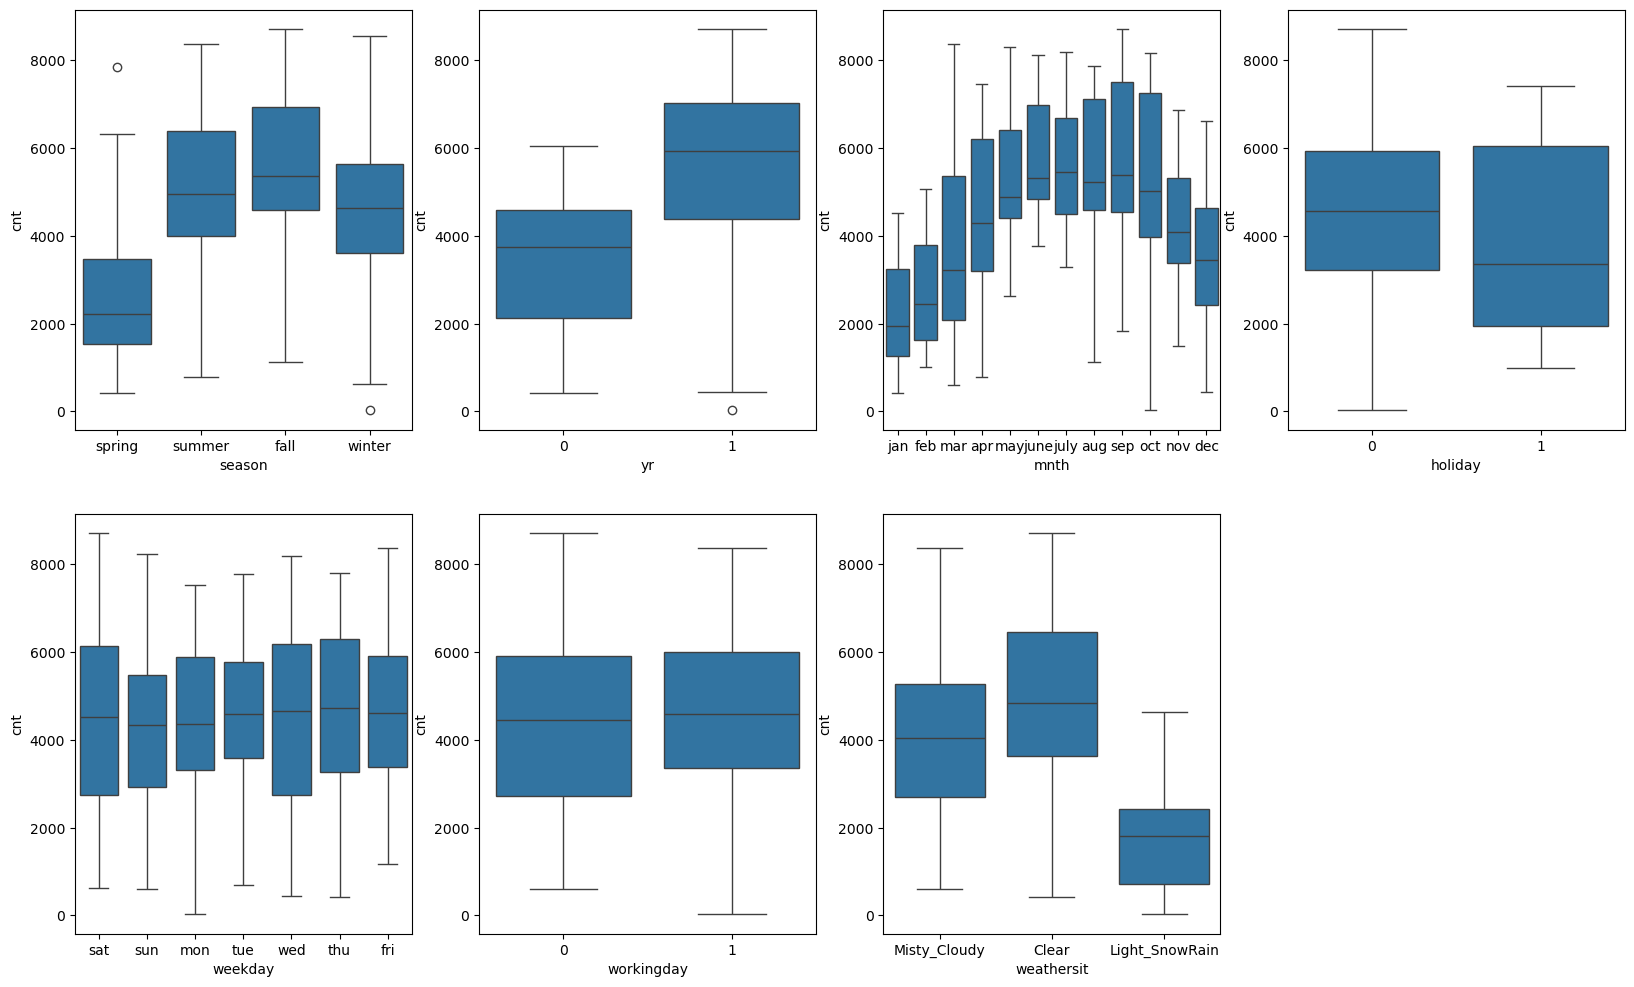

In [54]:
#Visualizing categorical variables 
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x ="season",y="cnt",data=bike_data)
plt.subplot(2,4,2)
sns.boxplot(x ="yr",y="cnt",data=bike_data)
plt.subplot(2,4,3)
sns.boxplot(x ="mnth",y="cnt",data=bike_data)
plt.subplot(2,4,4)
sns.boxplot(x ="holiday",y="cnt",data=bike_data)
plt.subplot(2,4,5)
sns.boxplot(x ="weekday",y="cnt",data=bike_data)
plt.subplot(2,4,6)
sns.boxplot(x ="workingday",y="cnt",data=bike_data)
plt.subplot(2,4,7)
sns.boxplot(x ="weathersit",y="cnt",data=bike_data)

# Few analaysis from above box plot
 * Fall season have more usage compared to others
 * Year 2019 have more usage compared to 2018
 * Considering the month ,usage is more towards the middle of the year
 * Non Holidays have more bookings
 * Working days have more customers considering the weekday plot. Fri and Sat have good number of customers
 * Clear day have more customers compared to other weathersit 

__DATA PREPARATION__

* DUMMY VARIABLE CREATION

In [69]:
#use the pandas get_dummies method to create dummy variables for mnth , weekday,weathersit ,seasons

season_df =pd.get_dummies(bike_data.season,drop_first=True)
mnth_df= pd.get_dummies(bike_data.mnth, drop_first=True)
weekday_df =pd.get_dummies(bike_data.weekday,drop_first=True)
weathersit_df =pd.get_dummies(bike_data.weathersit,drop_first=True)

In [71]:
#concating new dummy variables
bike_data_new = pd.concat([bike_data ,season_df ,mnth_df ,weekday_df,weathersit_df],axis=1)

In [73]:
#Printing the new data head
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy
0,spring,0,jan,0,sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,...,False,False,False,True,False,False,False,False,False,True
1,spring,0,jan,0,sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,...,False,False,False,False,True,False,False,False,False,True
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,True,False,False,False,False,False,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,False,False,False,True,False,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [75]:
#Printing to check which value got removed during dummy variable creation

bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    bool   
 13  summer          730 non-null    bool   
 14  winter          730 non-null    bool   
 15  aug             730 non-null    bool   
 16  dec             730 non-null    bool   
 17  feb             730 non-null    boo

In [79]:
#Since dummy variqbles are created below variables can be dropped
bike_data_new.drop(["season","mnth" ,"weekday","weathersit"],axis=1 ,inplace=True)

In [81]:
#printing new data head
bike_data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [83]:
#Printing the info value to see which all variables have boolean values so that it can be coverted to numerical value
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    bool   
 9   summer          730 non-null    bool   
 10  winter          730 non-null    bool   
 11  aug             730 non-null    bool   
 12  dec             730 non-null    bool   
 13  feb             730 non-null    bool   
 14  jan             730 non-null    bool   
 15  july            730 non-null    bool   
 16  june            730 non-null    bool   
 17  mar             730 non-null    boo

In [85]:
#Converting bool variables to numberical values 
var_list = ["spring","summer","winter","aug","dec","feb","jan","july","june","mar","may","nov","oct","sep","mon","sat","sun","thu","tue","wed","Light_SnowRain","Misty_Cloudy"]
bike_data_new[var_list] = bike_data_new[var_list].apply(lambda x : x.map({True:1 , False:0}))

In [89]:
#printing the latest data to see all values are converted to boolean as expected

bike_data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
#Checking the datatype once again to ensure all bool are converted

bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    int64  
 9   summer          730 non-null    int64  
 10  winter          730 non-null    int64  
 11  aug             730 non-null    int64  
 12  dec             730 non-null    int64  
 13  feb             730 non-null    int64  
 14  jan             730 non-null    int64  
 15  july            730 non-null    int64  
 16  june            730 non-null    int64  
 17  mar             730 non-null    int

**Data Splitting to Train and Test Data**

In [98]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [143]:
#Creating dtrain and dtest data
dtrain ,dtest = train_test_split(bike_data_new ,train_size=0.7 ,random_state=100)

In [145]:
#chekcing shape
dtrain.shape

(510, 30)

In [147]:
dtest.shape

(220, 30)

In [149]:
#Rescaling features for uniformity
#Using MinMax scaler for rescaling
scaler =MinMaxScaler()
num_vars = ["temp" ,"atemp" ,"hum" ,"windspeed" ,"cnt"]
dtrain[num_vars] =scaler.fit_transform(dtrain[num_vars])

In [151]:
#printing the data to see if the values are rescaled
dtrain.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [153]:
#Check the describe for dtrain
dtrain.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


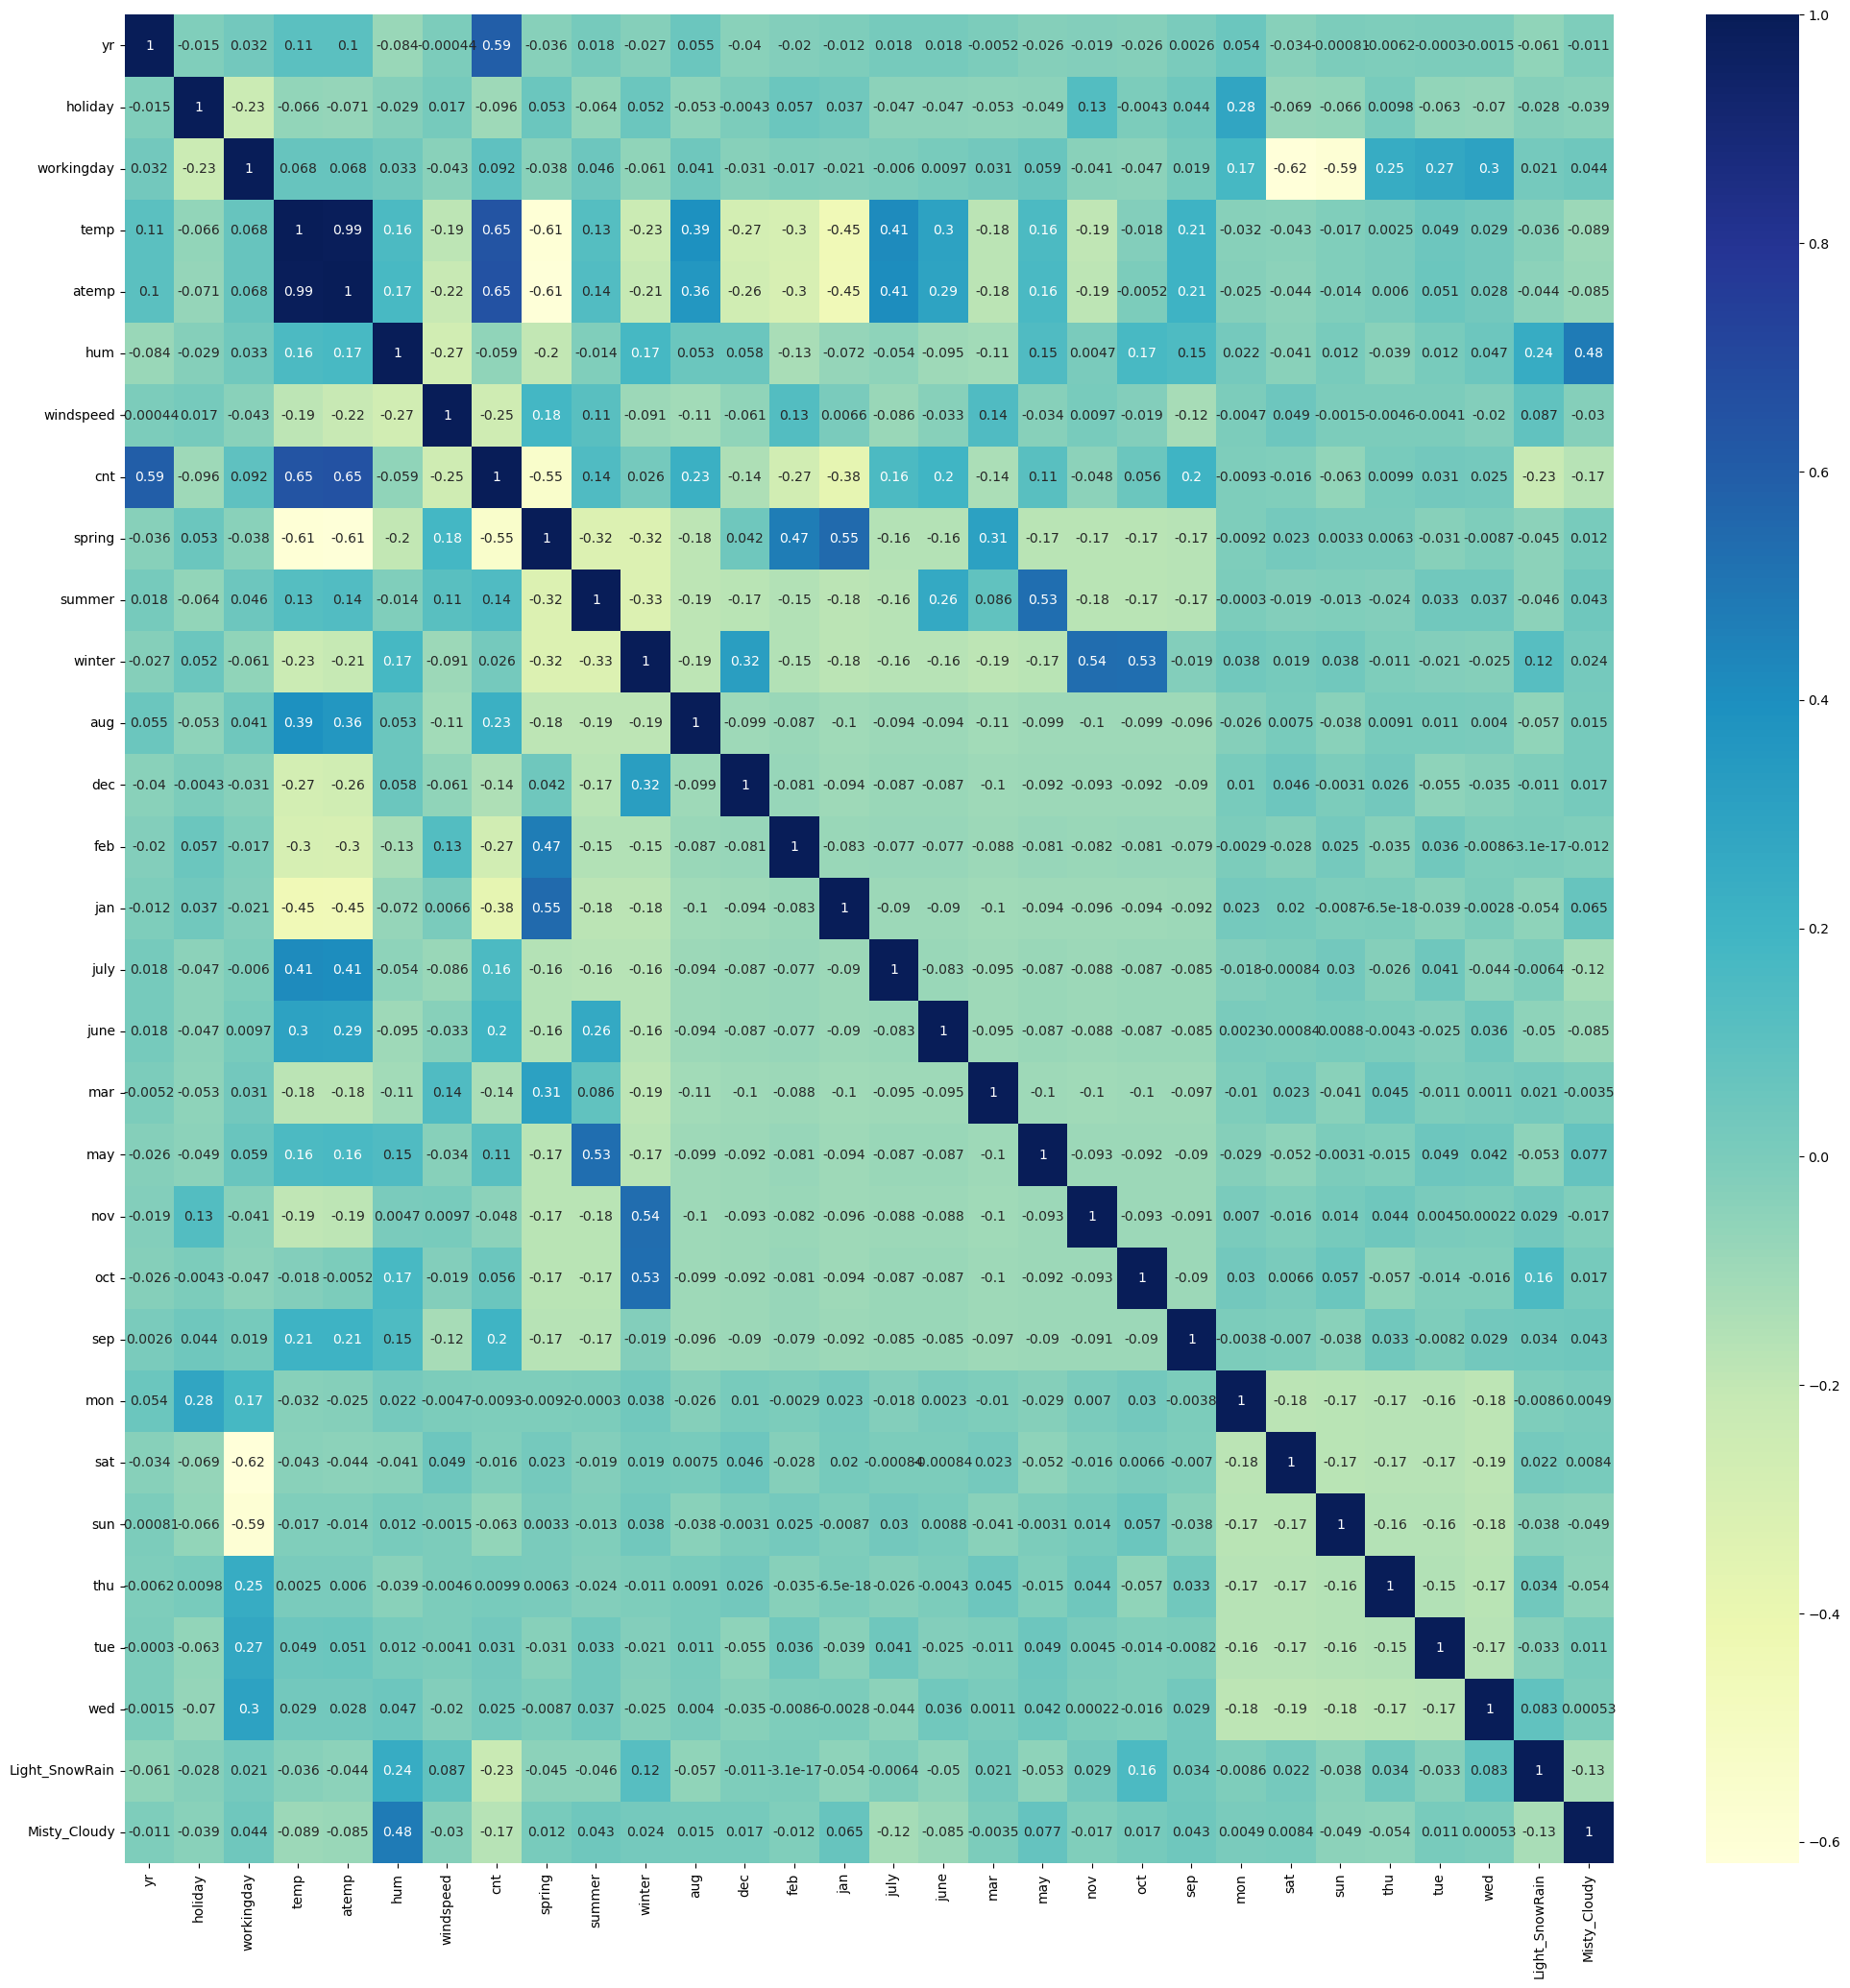

In [155]:
#Use the heatmap to see the correlation between the variables
plt.figure(figsize=(25,25))
sns.heatmap(dtrain.corr() ,annot =True ,cmap ="YlGnBu")
plt.show()

**From the above heat map below are the observations**
 - cnt have a high postive correlation with temp
 - cnt have a same correlation with atemp as well.
 - So both temp and atemp might be providing the same data and can be a case of multi collinearity
 - cnt have a good correlation with yr

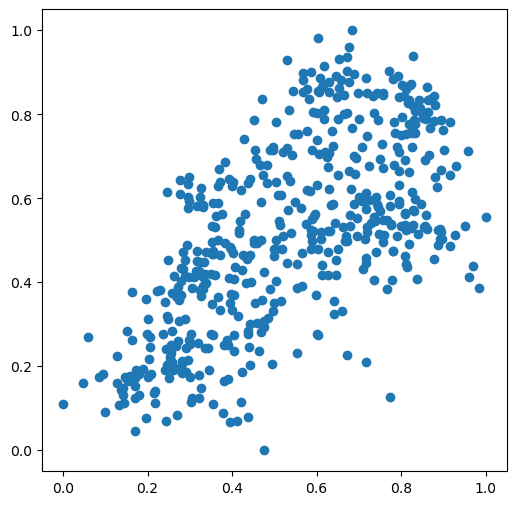

In [158]:
#Plot the Scatter plot for temp vs cnt
plt.figure(figsize= (6,6))
plt.scatter(dtrain["temp"] ,dtrain["cnt"])
plt.show()

**The above diagram shows a positive linear relationship between temp and cnt variable**

## LINEAR MODEL CREATION USING RFE ##

In [161]:
#Importing the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

__Using the Recursive Feature Elimination method to build the model__

In [163]:
# poping out cnt which is the target variable
y_train =  dtrain.pop("cnt")
X_train = dtrain

In [165]:
#Building the model
lm = LinearRegression()
lm.fit(X_train,y_train)

#Provide the number of featueres to be selected
rfe = RFE(estimator=lm, n_features_to_select= 15)
rfe = rfe.fit(X_train,y_train)

In [167]:
#printing the list of columns that is selected
list(zip(X_train .columns ,rfe.support_ ,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 10),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 9),
 ('tue', False, 8),
 ('wed', False, 13),
 ('Light_SnowRain', True, 1),
 ('Misty_Cloudy', True, 1)]

In [169]:
#Selected Columns 

columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Light_SnowRain',
       'Misty_Cloudy'],
      dtype='object')

In [171]:
#Creating X_test with RFE selected variables
X_train_rfe = X_train[columns]

In [173]:
#Defining a finction for VIF

def calculateVIF(df):
    vif =pd.DataFrame()
    vif["Features" ] = df.columns
    vif["VIF"] =[variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
    vif ["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values (by = "VIF" ,ascending=False)
    return vif
    

In [175]:
#Calculating the VIF for the initial RFE selected columns
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,sat,12.20
12,sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,hum,1.91
14,Misty_Cloudy,1.57


__MODEL BUILDING__

In [178]:
#Adding Constant 
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 =sm.OLS(y_train ,X_train_lm_1).fit()

In [182]:
#Printing the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          2.11e-191
Time:                        22:21:03   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [184]:
#Dropping working day as it was showing very high VIF value
X_train_new = X_train_rfe.drop(["workingday"] ,axis =1)
#Calculate VIF again
calculateVIF(X_train_new)

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
5,spring,4.03
7,winter,3.36
6,summer,2.79
13,Misty_Cloudy,2.30
0,yr,2.08
8,july,1.59
9,sep,1.39


In [186]:
#Creating second Linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 =sm.OLS(y_train ,X_train_lm_2).fit()

In [188]:
#Printing the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          2.11e-191
Time:                        22:27:44   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2832      0.034      8.

In [190]:
#We can drop hum variable as it having a very High P value
X_train_new = X_train_new.drop(["hum"] ,axis =1)

#Calculate VIF again
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
5,summer,2.24
4,spring,2.13
0,yr,2.07
6,winter,1.84
7,july,1.59
12,Misty_Cloudy,1.56
8,sep,1.34
9,sat,1.23


__VIF value of temp reduced from 16.06 to 5.18 which is good. VIF can be improved further__

In [193]:
#Building the third regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 =sm.OLS(y_train ,X_train_lm_3).fit()

In [195]:
#printing the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          1.28e-188
Time:                        22:33:09   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2037      0.029      6.

In [197]:
#sat variable can be dropped as it is having very high p value
X_train_new = X_train_new.drop(["sat"] ,axis =1)

#Calculate VIF again
calculateVIF(X_train_new)


,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.24
4,spring,2.11
0,yr,2.07
6,winter,1.81
7,july,1.59
11,Misty_Cloudy,1.56
8,sep,1.34
9,sun,1.18


In [199]:
#Building the fourth regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 =sm.OLS(y_train ,X_train_lm_4).fit()

In [201]:
#printing the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          1.45e-189
Time:                        22:56:42   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

In [203]:
#Drop July as it is having a high p value
X_train_new = X_train_new.drop(["july"] ,axis =1)

#Calculate VIF again
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,yr,2.07
4,spring,2.02
5,summer,1.91
6,winter,1.66
10,Misty_Cloudy,1.55
7,sep,1.23
8,sun,1.18
9,Light_SnowRain,1.08


__Now all VIF looks to be below 5 and is decent. We can check the summary__

In [208]:
#Building the fift regression model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 =sm.OLS(y_train ,X_train_lm_5).fit()

In [210]:
#printing the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          3.23e-189
Time:                        23:01:44   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.

In [212]:
#spring can be dropped to furthur optmize the model as it is having high p value
X_train_new = X_train_new.drop(["spring"] ,axis =1)

#Calculate VIF again
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
4,summer,1.57
9,Misty_Cloudy,1.48
5,winter,1.39
6,sep,1.21
7,sun,1.17
8,Light_SnowRain,1.08
1,holiday,1.04


__There is a decent reduction in VIF for temp and windspeed__

In [215]:
#Building the sixth regression model
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 =sm.OLS(y_train ,X_train_lm_6).fit()

In [217]:
#printing the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          6.34e-189
Time:                        23:05:04   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1344      0.017      8.

 **Current model lr_6 seems to be a good model considering below points**
  - Very less multi collinearity between the predictors
  - All p values are 0 and which indicate they are very significant
  -  F-statistic value 255 is greater than 1
  -  Prob of F-statistic is 6.34e-189 which is almost equal to zero
  -  A good R^2 value of 0.836

In [222]:
#Checking the params in lr_6
lr_6.params

const             0.134431
yr                0.232752
holiday          -0.106683
temp              0.547114
windspeed        -0.153073
summer            0.087801
winter            0.131138
sep               0.099353
sun              -0.049842
Light_SnowRain   -0.288321
Misty_Cloudy     -0.080555
dtype: float64

__RESIDUAL ANALYSIS ON TRAIN DATA__

In [229]:
#Predicting y_train_pred
y_train_pred = lr_6.predict(X_train_lm_6)

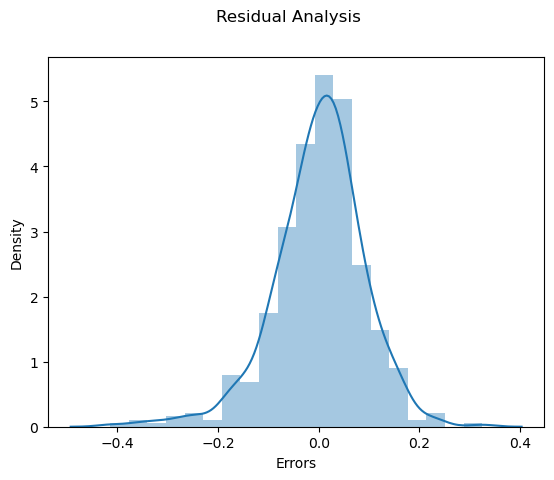

In [231]:
#Plot the histogram for Error
fig = plt.figure()
sns.distplot(y_train - y_train_pred, bins =20)
plt.xlabel("Errors")
plt.suptitle("Residual Analysis")
plt.show()

__Residual analysis plot shows that Errors are normally distributed__

__Mean of the Error is zero__

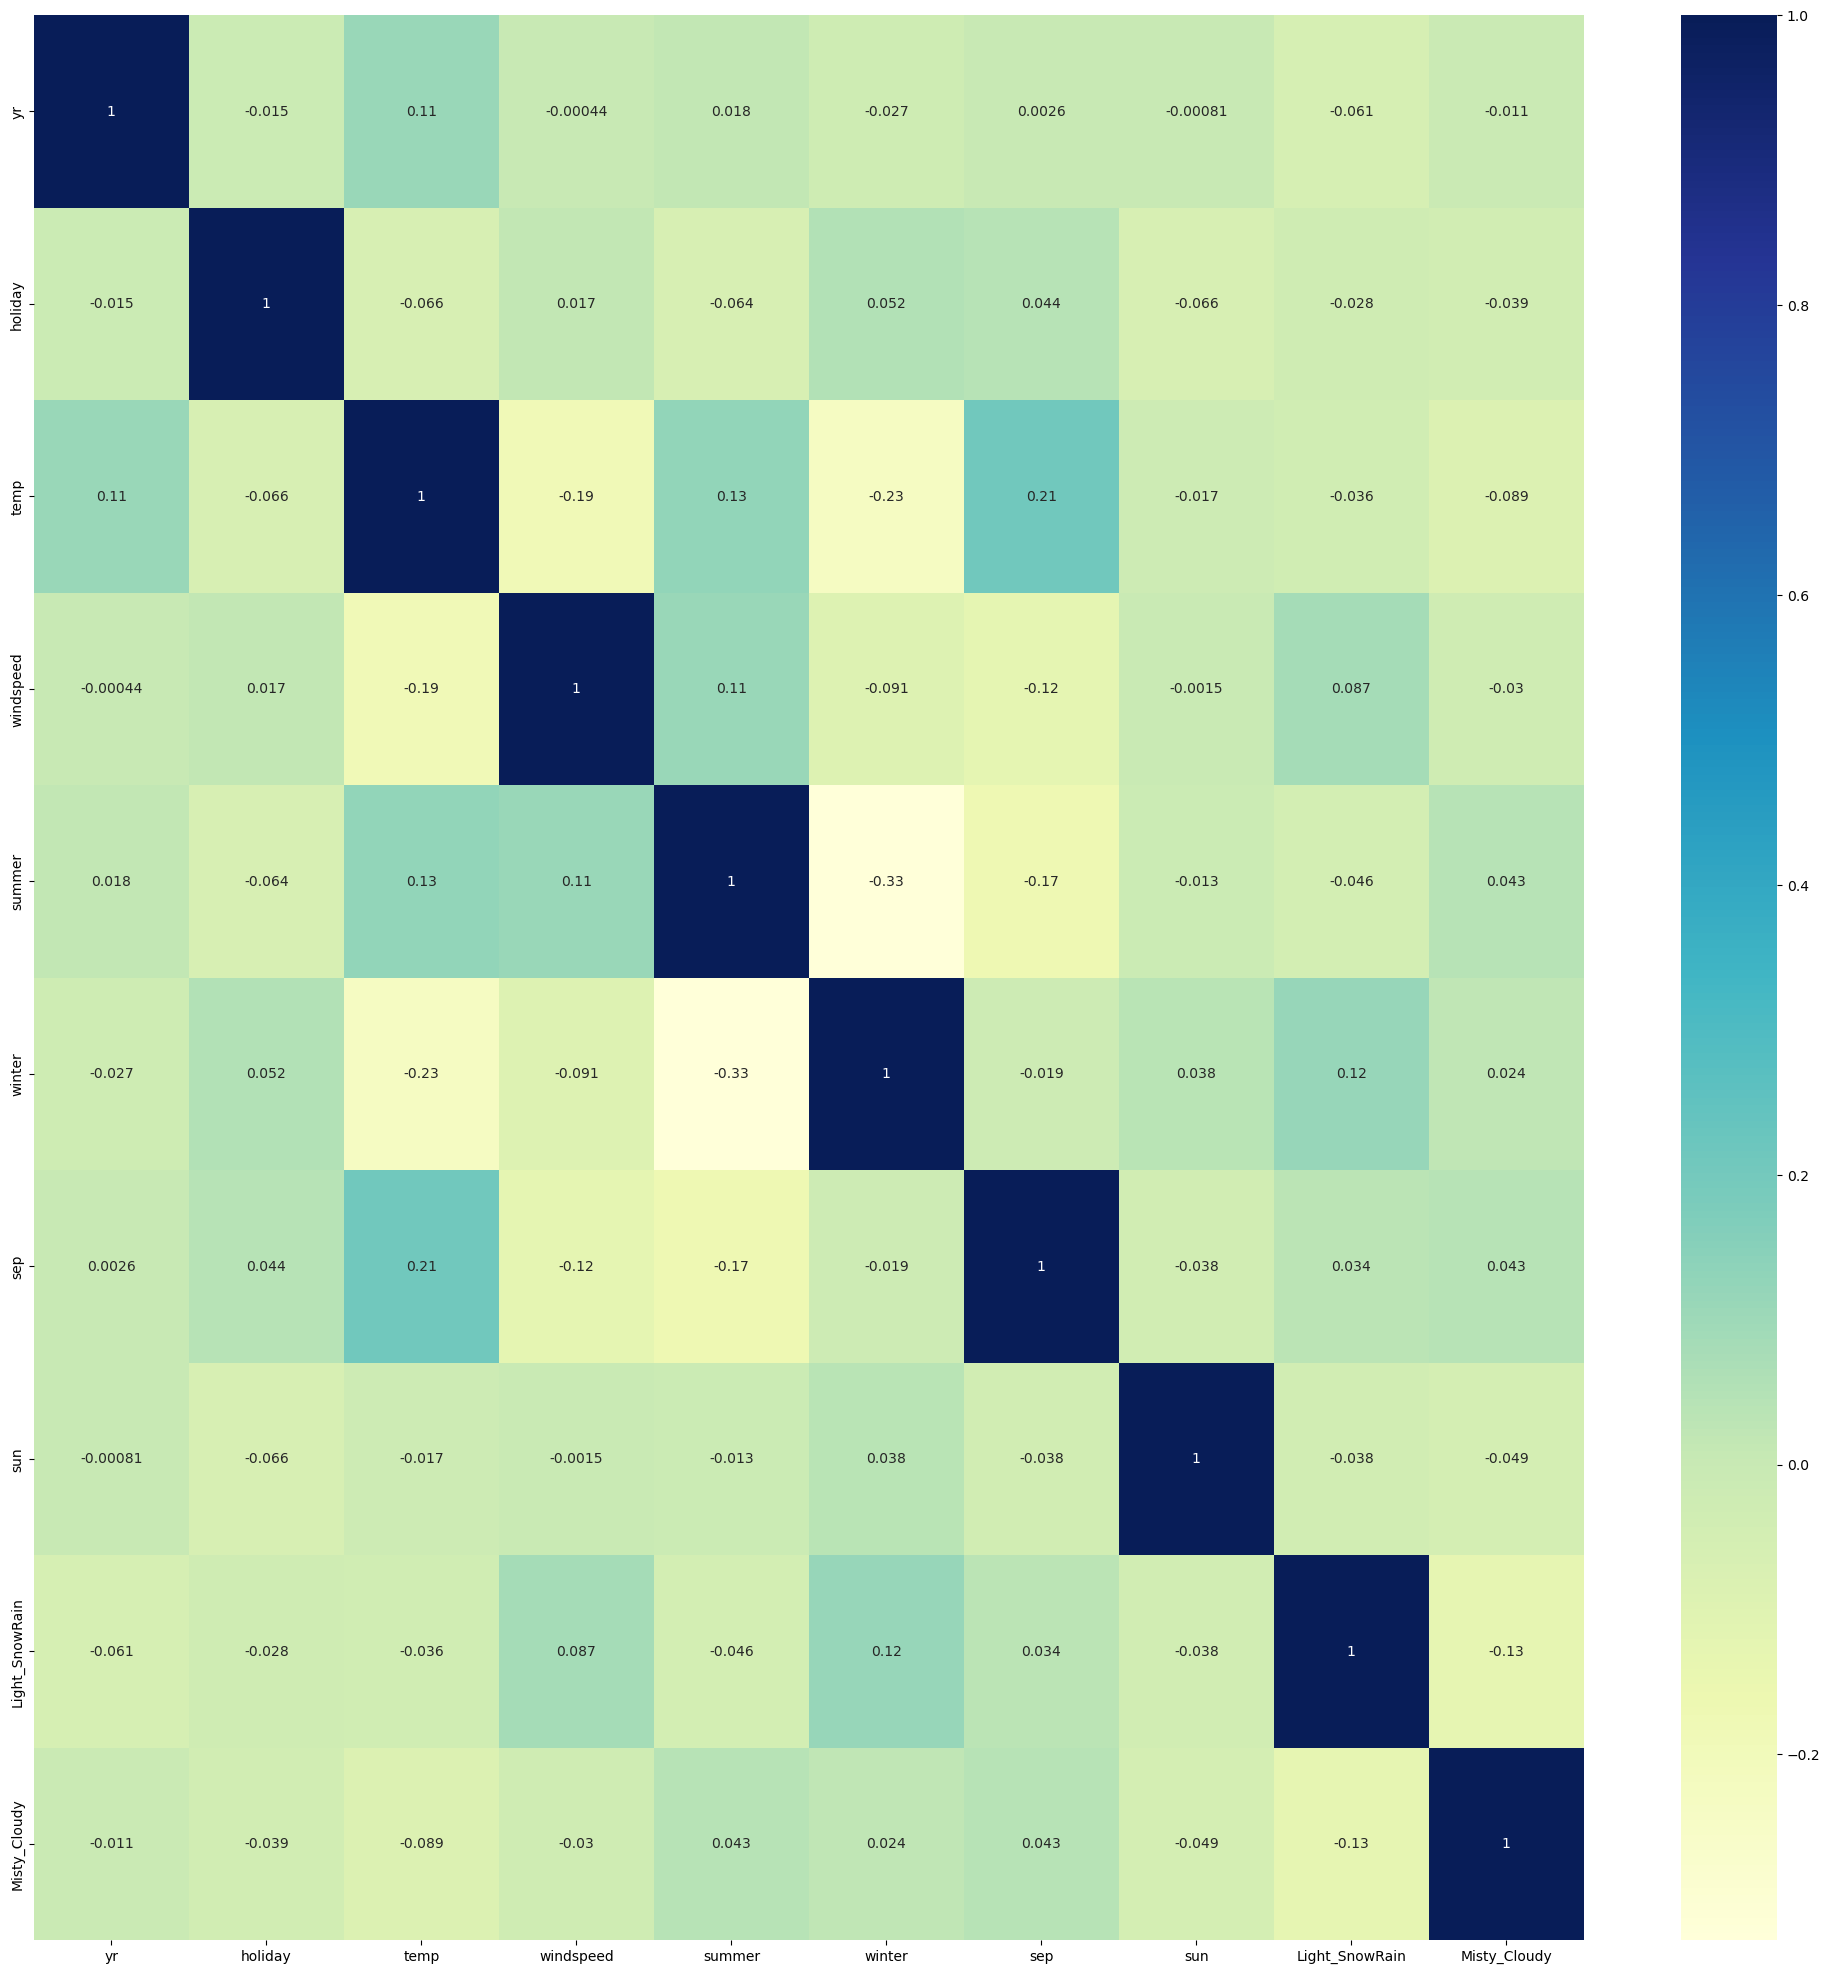

In [237]:
#plotting heat map to check if collinearity is present
plt.figure(figsize=(25,25))
sns.heatmap(X_train_new.corr() ,annot =True ,cmap ="YlGnBu")
plt.show()

__Checking the VIF values once again__

In [241]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
4,summer,1.57
9,Misty_Cloudy,1.48
5,winter,1.39
6,sep,1.21
7,sun,1.17
8,Light_SnowRain,1.08
1,holiday,1.04


__All VIF are below 5 and heatmap is not showing any signs of multicollinearity__

# PREDICTIONS ON TEST DATA

In [247]:
#Just using the transform method here

num_vars = ["temp" ,"atemp" ,"hum" ,"windspeed" ,"cnt"]
dtest[num_vars] =scaler.transform(dtest[num_vars])
dtest.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [249]:
#Poping out the y variable and setting remaining to X_test
y_test = dtest.pop("cnt")
X_test = dtest

In [251]:
#Creating X_test dataframe by dropping variables from X_test
col1 = X_train_new.columns
X_test_new = X_test[col1]
#Adding constant to X_test
X_test_lm = sm.add_constant(X_test_new)

In [253]:
#predicting y_pred using lr_6
y_pred = lr_6.predict(X_test_lm)

__Calculating R^2 value__

In [256]:
r2 = r2_score(y_test ,y_pred)
round(r2,4)

0.7965

## MODEL EVALUATION 

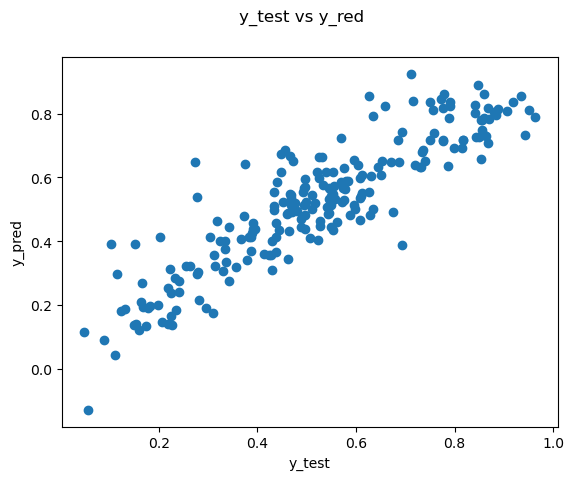

In [261]:
#Plotting a scalar plot

fig =plt.figure()
plt.scatter(y_test ,y_pred)
fig.suptitle("y_test vs y_red")
plt.xlabel ("y_test")
plt.ylabel("y_pred")
plt.show()

In [265]:
#Calculating adjusted R^2 for test data - Formula used is 1- ((1-r2)(n-1)/(n-p-1)

adjusted_r2 = 1- (1-r2)*(X_test.shape[0]-1)/(X_test.shape[0] -X_test.shape[1]-1)
print(round(adjusted_r2,4))

0.7654


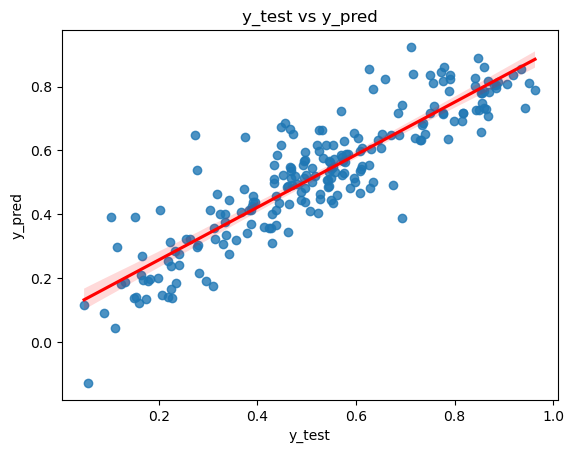

In [277]:
#Plotting the Regression plot
plt.figure()
sns.regplot(x =y_test ,y = y_pred ,line_kws={"color" :"red"})
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Analysis on Training and Test Data

__Below are the key datasets on creating model and the comparison between Training and Test data__

- Train Data R^2 - 0.836
- Test Data R^2 -  0.796
- Train Data Adjusted R^2 - 0.833
- Test Data Adjusred R^2 - 0.7654

__Total Depending factors on bike demand are as below__

- yr , temp , summer, winter ,sep ,holiday,windspeed,sun,Light_SnowRain ,Misty_cloudy
